In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [253]:
def set_precision(t):
    tau = float(format(t, '.1f'))
    
    return tau

In [343]:
def get_freq_func(input_json, data_csv_file):
    ttc_freq = dict()
    
    with open (input_json) as infile:
        pair_data = json.load(infile)
    
    # remove all inf data
    pair_data = [i for i in pair_data if i != np.inf]
    
    for t in pair_data:
        # round tau
        tau = set_precision(t)
        if ttc_freq.has_key(tau):
            ttc_freq[tau] = ttc_freq[tau] + 1
        else:
            ttc_freq[tau] = 1
            
    total_pair = len(pair_data)
    print 'total pair: ', total_pair
    print 'total tau: ', len(ttc_freq)
    
    # create dataframe
    lists = sorted(ttc_freq.items()) # sorted by key, return a list of tuples
    df = pd.DataFrame(lists, columns=['tau', 'freq'])
    # normalize freq
    df['freq'] = df['freq'].apply(lambda x: x / float(total_pair))
    
    # write ttc data to csv file
    df_tau = pd.DataFrame(pair_data, columns=['tau'])
    df_tau.to_csv(data_csv_file, index=False)
    print "Write tau data to {} success.".format(data_csv_file)
    
    return total_pair, df

In [351]:
###### pairwise ttc values ######

size, pair_df = get_freq_func('pair_ttc.json', 'pairwise_ttc_values.csv')
# write pair ttc csv
pair_df.to_csv('pairwise_ttc.csv', index=False)
print "Write freq function to csv success."

# draw pair ttc data
pair_df = pair_df.set_index('tau')
# pair_df.plot(style=[])
# plt.show()

total pair:  35952
total tau:  909
Write tau data to pairwise_ttc_values.csv success.
Write freq function to csv success.


In [352]:
###### pairwise ttc scrambled values ######

scramble_size, pair_scramble_df = get_freq_func('pair_ttc_scramble.json', 'pairwise_ttc_scrambled_values.csv')
# write pair ttc csv
pair_scramble_df.to_csv('pairwise_ttc_scrambles.csv', index=False)
print "Write freq function to csv success."

# draw pair ttc scrambled data
pair_scramble_df = pair_scramble_df.set_index('tau')
# pair_scramble_df.plot(style=[])
# plt.show()

total pair:  43297
total tau:  1078
Write tau data to pairwise_ttc_scrambled_values.csv success.
Write freq function to csv success.


In [395]:
##### pair distribution fuction #####

pair_tau = pair_df.index.tolist()
pair_scramble_tau = pair_scramble_df.index.tolist()
pdf = dict()

ratio = float(size) / scramble_size
print "ratio: ", ratio

tau_values = set(pair_tau + pair_scramble_tau)
for tau in tau_values:
    if tau in pair_tau and tau in pair_scramble_tau:
        pdf[tau] = (pair_df.loc[tau, :].get('freq') / pair_scramble_df.loc[tau, :].get('freq')) * ratio
        
pdf_lists = sorted(pdf.items()) # sorted by key, return a list of tuples
pdf_df = pd.DataFrame(pdf_lists, columns=['tau', 'g(tau)'])
# write pair ttc csv
pdf_df.to_csv('pdf.csv', index=False)
print "Write to csv success."

ratio:  0.830357761508
Write to csv success.


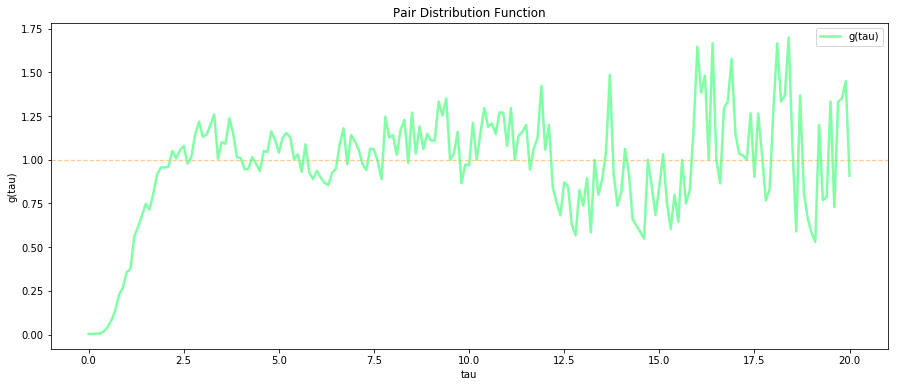

In [396]:
# draw pdf
pdf_df_by_tau = pdf_df.set_index('tau')
# pdf_df_by_tau.plot(style=[])
# plt.show()

# crop
crop_df_pdf = pdf_df_by_tau.loc[:20, :]
ax_pdf = crop_df_pdf.plot(title='Pair Distribution Function', color=[(0.3, 1.0, 0.5)], alpha=0.7, linewidth=2.5)
ax_pdf.set_ylabel("g(tau)")
ax_pdf.axhline(y=1.0, xmin=0, xmax=3, color=(1.0, 0.6, 0.16), alpha=0.5, linewidth=1.2, zorder=0, ls='dashed')
plt.rcParams['figure.figsize'] = [15.0, 6.0]
plt.show()

-0.0007608958934587405 1.0435448819586566


Text(0,0.5,u'g(tau)')

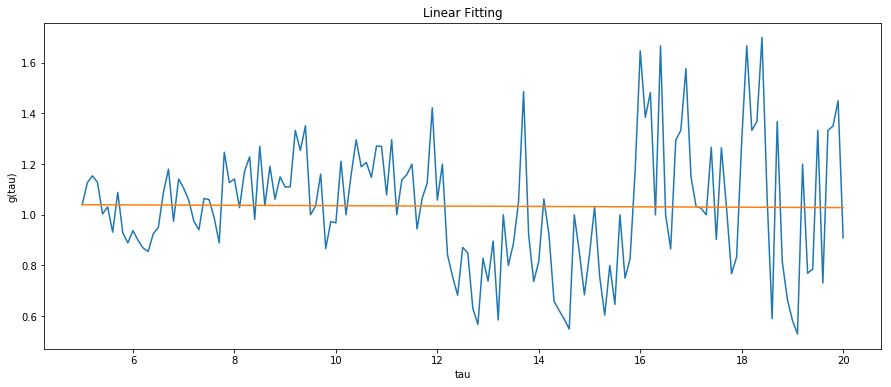

In [422]:
# fitting - just for testing

test_df = pdf_df_by_tau.loc[5 :20, :]
xi = test_df.index.tolist()
y = test_df['g(tau)'].tolist()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
print slope, intercept
line = [i * slope + intercept for i in xi]

plt.plot(xi, y,'-', xi, line)
plt.title('Linear Fitting')
plt.xlabel('tau')
plt.ylabel('g(tau)')

In [423]:
##### interaction energy #####

import math

u_df = pd.read_csv('pdf.csv')
u_df.columns = ['tau', 'energy']
u_df['energy'] = u_df['energy'].apply(lambda x: math.log(1.0 / x) if x != 0.0 else math.log(1.0 / np.finfo('float64').eps))
u_df.to_csv('energy.csv', index=False)
print "Write to csv success."

Write to csv success.


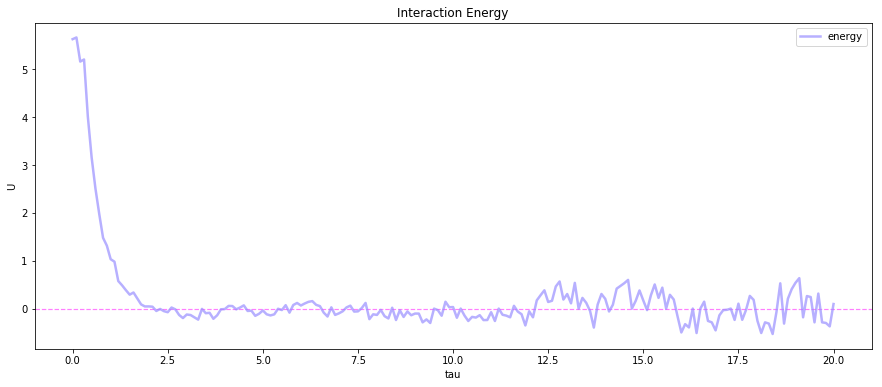

In [424]:
# draw energy
u_df = u_df.set_index('tau')
# u_df.plot(style=[])
# plt.show()

# crop
crop_df_u = u_df.loc[:20, :]
ax_u = crop_df_u.plot(title='Interaction Energy', color=[(0.6, 0.56, 1.0)], alpha=0.7, linewidth=2.5)
ax_u.set_ylabel('U')
ax_u.axhline(y=0.0, xmin=0, xmax=3, color=(1.0, 0.0, 1.0), alpha=0.5, linewidth=1.2, zorder=0, ls='dashed')
plt.show()